# Imports

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,  
    roc_auc_score,
    RocCurveDisplay,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



# EDA

In [230]:
df = pd.read_csv("employee_data.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [231]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11581 entries, 0 to 11580
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11581 non-null  float64
 1   last_evaluation        11581 non-null  float64
 2   number_project         11581 non-null  int64  
 3   average_montly_hours   11581 non-null  int64  
 4   time_spend_company     11581 non-null  int64  
 5   Work_accident          11581 non-null  int64  
 6   quit                   11581 non-null  int64  
 7   promotion_last_5years  11581 non-null  int64  
 8   department             11581 non-null  object 
 9   salary                 11581 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 904.9+ KB


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
quit                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [232]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

Number of duplicate rows: 9


In [233]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [234]:
df['quit'].value_counts(normalize=True)

quit
0    0.827947
1    0.172053
Name: proportion, dtype: float64

In [235]:
X = df.drop(columns='quit')
y = df['quit']

In [236]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numeric_features,categorical_features

(['satisfaction_level',
  'last_evaluation',
  'number_project',
  'average_montly_hours',
  'time_spend_company',
  'Work_accident',
  'promotion_last_5years'],
 ['department', 'salary'])

In [237]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years
count,11572.000000,11572.000000,11572.000000,11572.000000,11572.000000,11572.000000,11572.000000,11572.000000
mean,0.628514,0.716718,3.804096,200.559713,3.304787,0.152783,0.172053,0.013826
std,0.241965,0.168797,1.169089,48.828594,1.208246,0.359793,0.377443,0.116775
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [238]:
df[numeric_features + ['quit']].corr()['quit'].sort_values(ascending=False)

quit                     1.000000
time_spend_company       0.217585
average_montly_hours     0.070979
number_project           0.030954
last_evaluation          0.013680
promotion_last_5years   -0.038291
Work_accident           -0.126763
satisfaction_level      -0.354661
Name: quit, dtype: float64

# Visual EDA

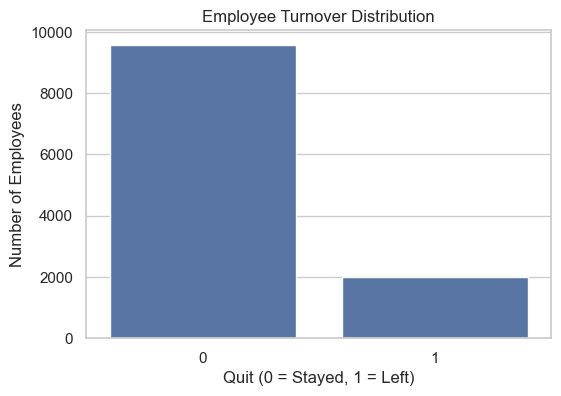

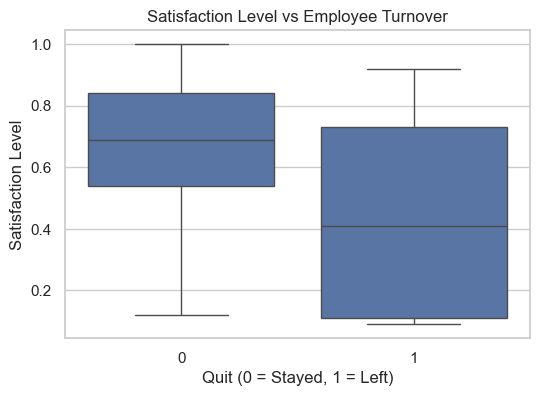

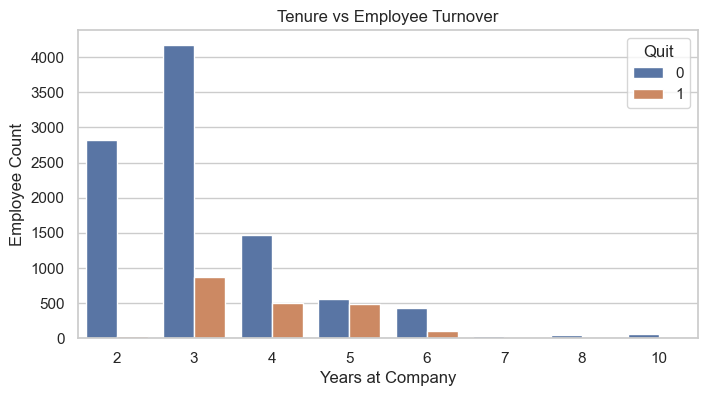

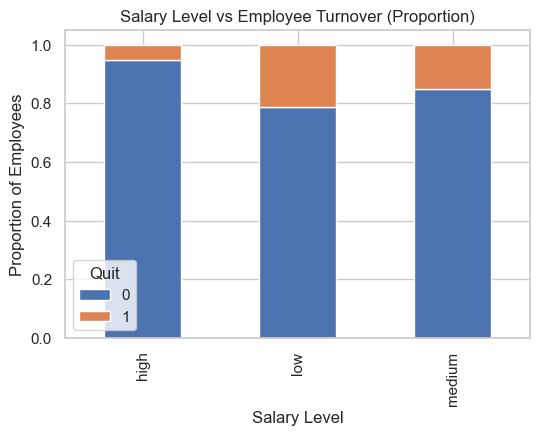

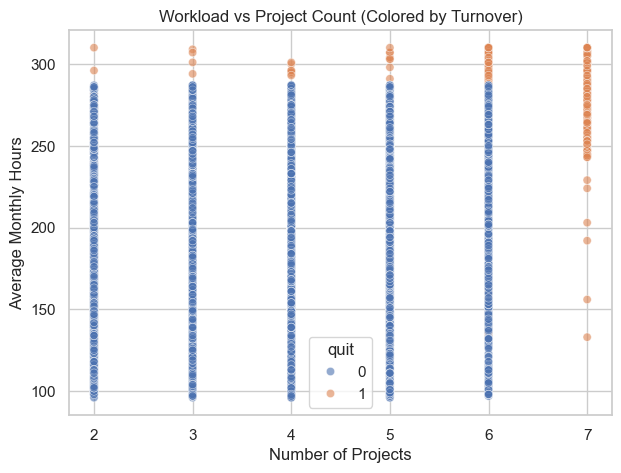

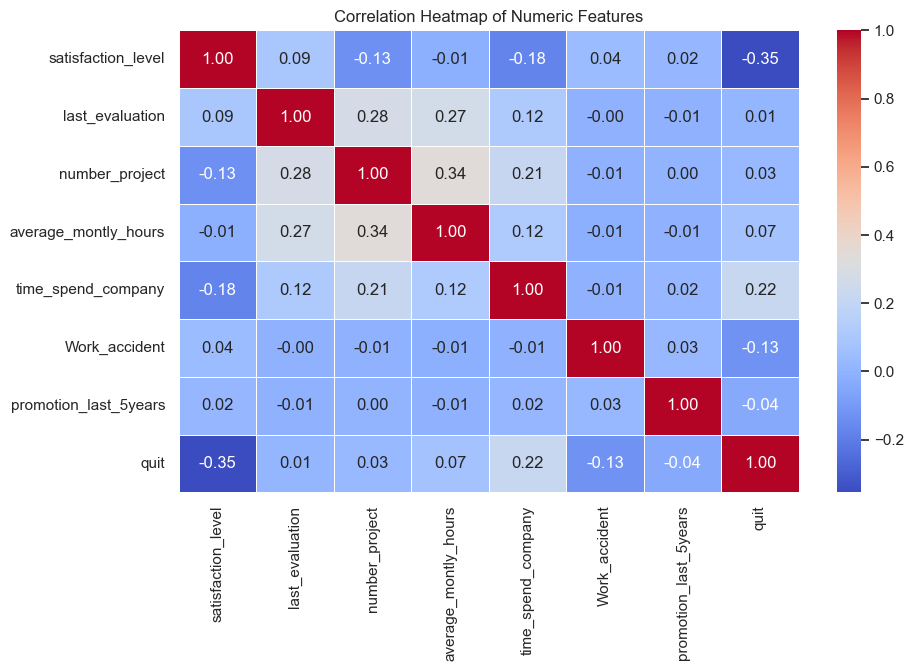

In [239]:
# 1. Employee Turnover Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='quit', data=df)
plt.title("Employee Turnover Distribution")
plt.xlabel("Quit (0 = Stayed, 1 = Left)")
plt.ylabel("Number of Employees")
plt.show()

# 2. Satisfaction Level vs Employee Turnover
plt.figure(figsize=(6, 4))
sns.boxplot(x='quit', y='satisfaction_level', data=df)
plt.title("Satisfaction Level vs Employee Turnover")
plt.xlabel("Quit (0 = Stayed, 1 = Left)")
plt.ylabel("Satisfaction Level")
plt.show()

# 3. Tenure vs Employee Turnover
plt.figure(figsize=(8, 4))
sns.countplot(x='time_spend_company', hue='quit', data=df)
plt.title("Tenure vs Employee Turnover")
plt.xlabel("Years at Company")
plt.ylabel("Employee Count")
plt.legend(title="Quit")
plt.show()

# 4. Salary Level vs Employee Turnover (Proportion)
salary_quit = (
    df.groupby(['salary', 'quit'])
    .size()
    .unstack()
    .div(df.groupby('salary').size(), axis=0)
)
salary_quit.plot(
    kind='bar',
    stacked=True,
    figsize=(6, 4)
)
plt.title("Salary Level vs Employee Turnover (Proportion)")
plt.xlabel("Salary Level")
plt.ylabel("Proportion of Employees")
plt.legend(title="Quit")
plt.show()

# 5. Workload vs Project Count (Colored by Turnover)
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x='number_project',
    y='average_montly_hours',
    hue='quit',
    data=df,
    alpha=0.6
)
plt.title("Workload vs Project Count (Colored by Turnover)")
plt.xlabel("Number of Projects")
plt.ylabel("Average Monthly Hours")
plt.show()

# 6. Correlation Heatmap of Numeric Features
plt.figure(figsize=(10, 6))
# Ensure numeric_features is defined as the list of numeric column names
corr = df[numeric_features + ['quit']].corr()
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5
)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# Preprocessing

In [240]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [241]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [242]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [243]:
print(X_train.shape)
print(X_test.shape)

print(X_train_processed.shape)
print(X_test_processed.shape)

feature_names = preprocessor.get_feature_names_out()
feature_names

(9257, 9)
(2315, 9)
(9257, 20)
(2315, 20)


array(['num__satisfaction_level', 'num__last_evaluation',
       'num__number_project', 'num__average_montly_hours',
       'num__time_spend_company', 'num__Work_accident',
       'num__promotion_last_5years', 'cat__department_IT',
       'cat__department_RandD', 'cat__department_accounting',
       'cat__department_hr', 'cat__department_management',
       'cat__department_marketing', 'cat__department_product_mng',
       'cat__department_sales', 'cat__department_support',
       'cat__department_technical', 'cat__salary_high', 'cat__salary_low',
       'cat__salary_medium'], dtype=object)

# Logistic Regression

In [244]:
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    ))
])
log_reg_pipeline.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

In [245]:
y_pred = log_reg_pipeline.predict(X_test)
y_proba = log_reg_pipeline.predict_proba(X_test)[:, 1]

In [246]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      1917
           1       0.45      0.84      0.59       398

    accuracy                           0.80      2315
   macro avg       0.71      0.81      0.73      2315
weighted avg       0.87      0.80      0.82      2315



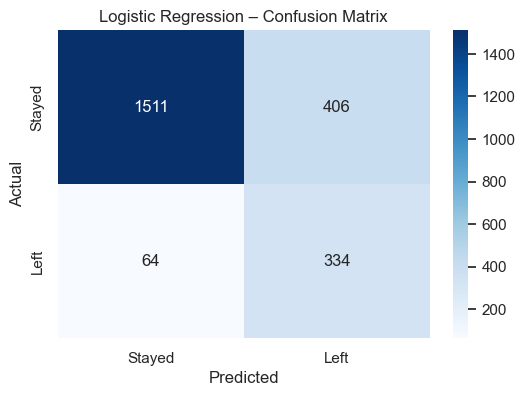

In [247]:
cm_lr = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm_lr,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Stayed', 'Left'],
    yticklabels=['Stayed', 'Left']
)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Logistic Regression – Confusion Matrix')
plt.show()


In [248]:
roc_auc = roc_auc_score(y_test, y_proba)
roc_auc

0.8529829638542216

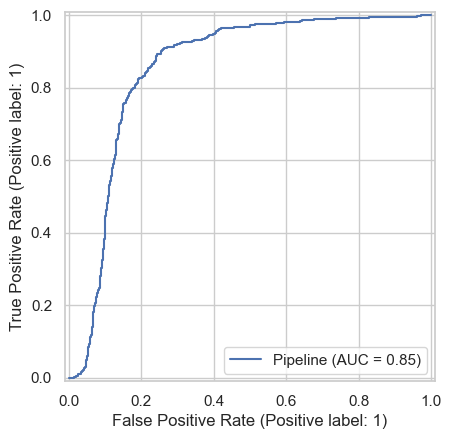

In [249]:
RocCurveDisplay.from_estimator(log_reg_pipeline, X_test, y_test)

In [250]:
feature_names = log_reg_pipeline.named_steps['preprocessor'].get_feature_names_out()
coefficients = log_reg_pipeline.named_steps['classifier'].coef_[0]

coef_df = (
    pd.DataFrame({
        'feature': feature_names,
        'coefficient': coefficients
    })
    .sort_values(by='coefficient', ascending=False)
)

coef_df.head(10), coef_df.tail(10)

(                       feature  coefficient
 4      num__time_spend_company     1.014071
 18             cat__salary_low     0.481634
 3    num__average_montly_hours     0.218458
 1         num__last_evaluation     0.128311
 14       cat__department_sales     0.055386
 19          cat__salary_medium     0.042085
 7           cat__department_IT     0.025461
 9   cat__department_accounting     0.022107
 12   cat__department_marketing     0.018517
 16   cat__department_technical     0.015521,
                         feature  coefficient
 15      cat__department_support     0.007644
 13  cat__department_product_mng     0.003008
 10           cat__department_hr    -0.091852
 6    num__promotion_last_5years    -0.213533
 11   cat__department_management    -0.316805
 5            num__Work_accident    -0.501948
 8         cat__department_RandD    -0.564020
 2           num__number_project    -0.586673
 0       num__satisfaction_level    -1.111689
 17             cat__salary_high    -1.34875

# Tree Based Models

## Decision Tree

In [251]:
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(
        max_depth=5,
        min_samples_leaf=50,
        class_weight='balanced',
        random_state=42
    ))
])
dt_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

In [252]:
y_pred_dt = dt_pipeline.predict(X_test)
y_proba_dt = dt_pipeline.predict_proba(X_test)[:, 1]

print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1917
           1       0.73      0.95      0.82       398

    accuracy                           0.93      2315
   macro avg       0.86      0.94      0.89      2315
weighted avg       0.94      0.93      0.93      2315



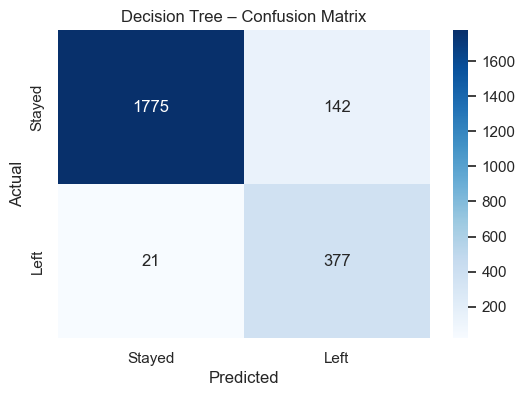

In [253]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm_dt,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Stayed', 'Left'],
    yticklabels=['Stayed', 'Left']
)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Decision Tree – Confusion Matrix')
plt.show()


In [254]:
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)
roc_auc_dt

0.9595886317345727

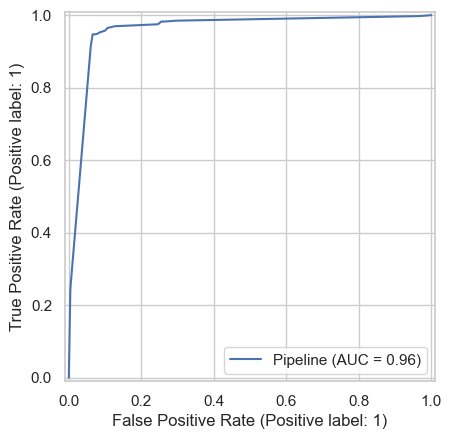

In [255]:
RocCurveDisplay.from_estimator(dt_pipeline, X_test, y_test)

## Random Forest

In [256]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        min_samples_leaf=20,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ))
])
rf_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

In [257]:
y_pred_rf = rf_pipeline.predict(X_test)
y_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]

print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1917
           1       0.93      0.93      0.93       398

    accuracy                           0.98      2315
   macro avg       0.96      0.96      0.96      2315
weighted avg       0.98      0.98      0.98      2315



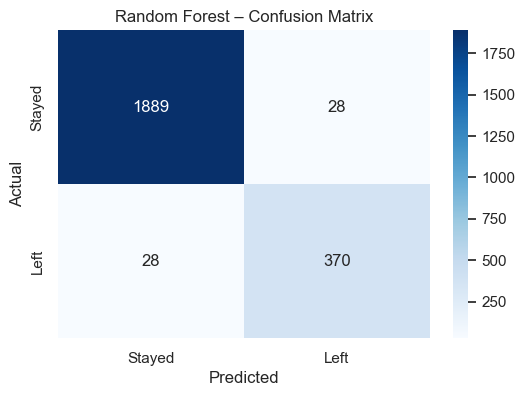

In [258]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm_rf,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Stayed', 'Left'],
    yticklabels=['Stayed', 'Left']
)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Random Forest – Confusion Matrix')
plt.show()

In [259]:
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
roc_auc_rf

0.9862523362771081

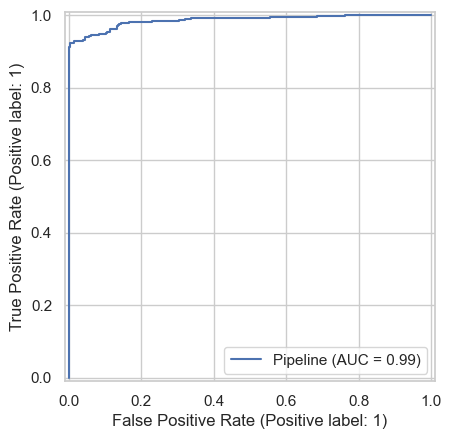

In [260]:
RocCurveDisplay.from_estimator(rf_pipeline, X_test, y_test)

In [261]:
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
importances = rf_pipeline.named_steps['classifier'].feature_importances_

importance_df = (
    pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    })
    .sort_values(by='importance', ascending=False)
)

importance_df.head(15)

,feature,importance
0,num__satisfaction_level,0.286315
4,num__time_spend_company,0.253241
2,num__number_project,0.173304
3,num__average_montly_hours,0.138967
1,num__last_evaluation,0.117302
5,num__Work_accident,0.011879
18,cat__salary_low,0.005757
17,cat__salary_high,0.005241
19,cat__salary_medium,0.002346
14,cat__department_sales,0.001179


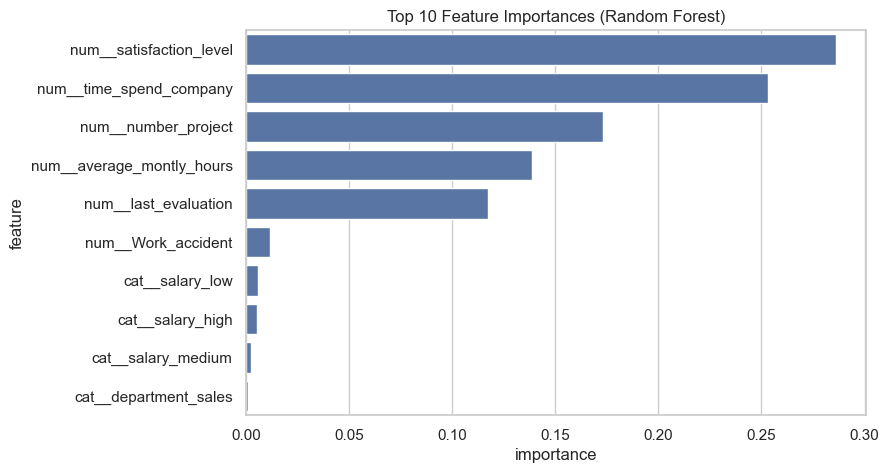

In [262]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=importance_df.head(10),
    x='importance',
    y='feature'
)
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

In [263]:
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)

precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)

precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)


results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'ROC_AUC': [roc_auc, roc_auc_dt, roc_auc_rf],
    'Precision (Quit)': [precision_lr, precision_dt, precision_rf],
    'Recall (Quit)': [recall_lr, recall_dt, recall_rf]
})

results


,Model,ROC_AUC,Precision (Quit),Recall (Quit)
0,Logistic Regression,0.852983,0.451351,0.839196
1,Decision Tree,0.959589,0.726397,0.947236
2,Random Forest,0.986252,0.929648,0.929648
